In [ ]:
!pip install matplotlib
!pip install scikit-learn

In [18]:
# LOAD LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
dataframe=pd.read_excel("dataset_breast.xlsx")

In [20]:
print(dataframe)

       Age         Workclass  FlnWgt   Education  Education-Num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           Marital Status         Occupation   Relationship   Race     Sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

In [21]:
dataframe_senza_duplicati = dataframe.drop_duplicates()
print(dataframe_senza_duplicati)

       Age         Workclass  FlnWgt   Education  Education-Num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           Marital Status         Occupation   Relationship   Race     Sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

In [22]:
# Definizione delle features e delle labels
X = dataframe_senza_duplicati.drop(columns=['Class'])  # Features
y = dataframe_senza_duplicati['Class']  # Label

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Identificazione delle colonne categoriche
categorical_features = X.select_dtypes(include=['object']).columns

# Applicazione di LabelEncoder a ogni colonna categorica
for col in categorical_features:
    X[col] = encoder.fit_transform(X[col])

# Applico encoder anche su y
y = encoder.fit_transform(y)

# Verifica del risultato
print(X)

       Age  Workclass  FlnWgt  Education  Education-Num  Marital Status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital Gain  Capital loss  \
0               1        

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Suddivisione dei dati in training e test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizializzazione del Decision Tree Classifier
# Puoi modificare il criterio (es. 'gini' o 'entropy') e la profondità massima
modello = DecisionTreeClassifier(criterion='gini', max_depth=5)

# Addestramento del modello
modello.fit(X_train, Y_train)

# Predizione sul set di test
Y_pred = modello.predict(X_test)

# Verifica dei risultati
print("Predizioni:", Y_pred[:5])

# Calcolo dell'accuratezza
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuratezza del modello: {accuracy:.4f}")


Predizioni: [0 0 1 0 0]
Accuratezza del modello: 0.8552


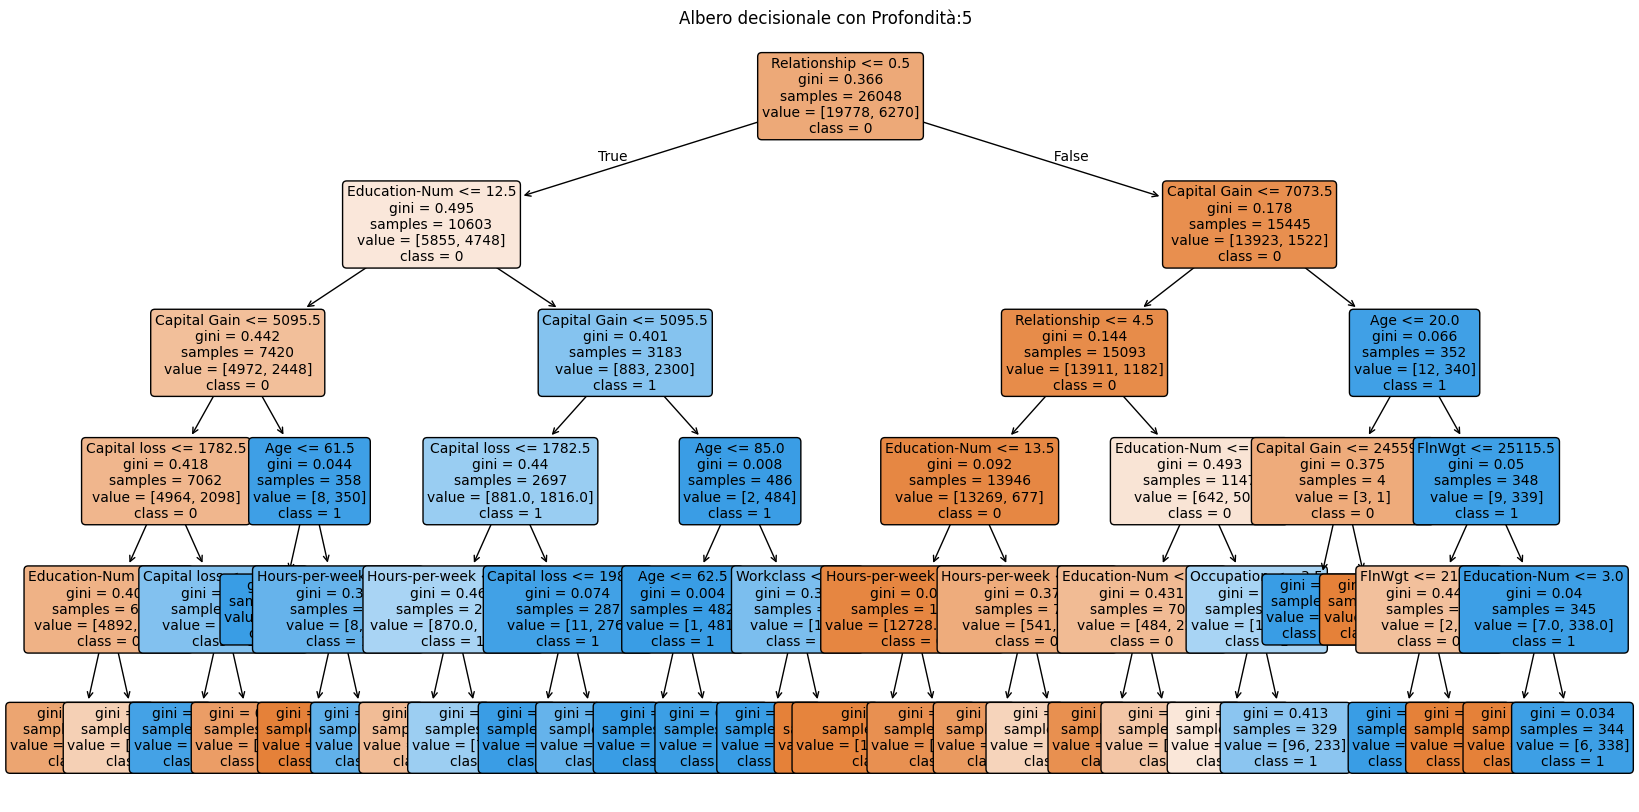

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Imposta la figura per migliorare la leggibilità
plt.figure(figsize=(20, 10))

# Visualizza l'albero decisionale
plot_tree(modello,
          feature_names=X.columns,  # Nomi delle features
          class_names=[str(c) for c in modello.classes_], # Nomi delle classi
          filled=True,              # Colorazione basata sulla classe
          rounded=True,             # Bordi arrotondati per maggiore leggibilità
          fontsize=10)              # Dimensione del testo

plt.title(f"Albero decisionale con Profondità:{str(modello.get_depth())}")
plt.show()


    max_depth  min_impurity_decrease  accuracy
0           1                   0.00  0.758790
1           1                   0.02  0.758790
2           1                   0.04  0.758790
3           1                   0.06  0.758790
4           1                   0.08  0.758790
5           1                   0.10  0.758790
6           2                   0.00  0.826040
7           2                   0.02  0.826040
8           2                   0.04  0.758790
9           2                   0.06  0.758790
10          2                   0.08  0.758790
11          2                   0.10  0.758790
12          3                   0.00  0.841548
13          3                   0.02  0.826040
14          3                   0.04  0.758790
15          3                   0.06  0.758790
16          3                   0.08  0.758790
17          3                   0.10  0.758790
18          4                   0.00  0.848764
19          4                   0.02  0.826040
20          4

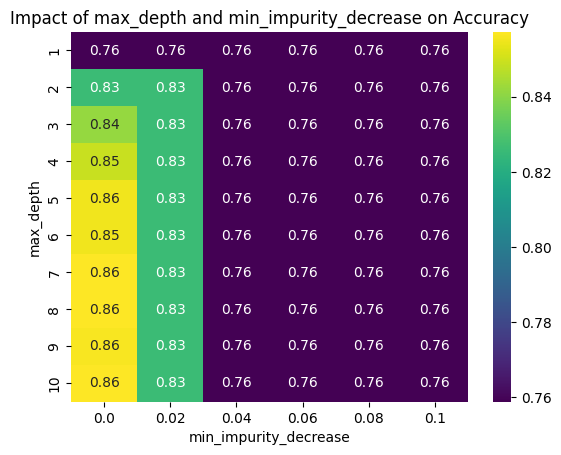

In [39]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Suddividere i dati in training e test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Intervalli di parametri da esplorare
max_depth_values = range(1, 11)  # Profondità dell'albero da 1 a 10
min_impurity_decrease_values = np.linspace(0.0, 0.1, 6)  # Valori di min_impurity_decrease da 0.0 a 0.1

# Variabili per memorizzare i risultati
results = []

# Ciclo annidato per esplorare le combinazioni di max_depth e min_impurity_decrease
for max_depth in max_depth_values:
    for min_impurity_decrease in min_impurity_decrease_values:
        # Inizializzare il modello con i parametri attuali
        modello = DecisionTreeClassifier(max_depth=max_depth,
                                     min_impurity_decrease=min_impurity_decrease,
                                     random_state=42)

        # Addestramento del modello
        modello.fit(X_train, Y_train)

        # Predizione sui dati di test
        Y_pred = modello.predict(X_test)

        # Calcolo dell'accuratezza
        accuracy = accuracy_score(Y_test, Y_pred)

        # Memorizzare i risultati
        results.append((max_depth, min_impurity_decrease, accuracy))

# Converting results to a DataFrame for easier visualization
results_df = pd.DataFrame(results, columns=['max_depth', 'min_impurity_decrease', 'accuracy'])

# Mostrare i risultati
print(results_df)

# Visualizzazione dei risultati (opzionale)
import seaborn as sns
pivot_table = results_df.pivot(index='max_depth', columns='min_impurity_decrease', values='accuracy')
sns.heatmap(pivot_table, annot=True, cmap="viridis", fmt=".2f")
plt.title("Impact of max_depth and min_impurity_decrease on Accuracy")
plt.show()


In [45]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Inizializzazione del modello
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Esegui cross-validation (k-fold, k=10)
cv_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

# Predizioni sui dati usando cross_val_predict
y_pred = cross_val_predict(clf, X, y, cv=10)

# Visualizza i risultati della cross-validation
print("Accuratezza per ogni fold:", cv_scores)
print(f"Accuratezza media: {cv_scores.mean():.4f}")
print(f"Deviazione standard: {cv_scores.std():.4f}")

# Calcolare la Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Mostrare la Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Calcolare l'accuratezza complessiva
accuracy = accuracy_score(y, y_pred)
print(f"Accuratezza complessiva: {accuracy:.4f}")


Accuratezza per ogni fold: [0.841572   0.8507371  0.85780098 0.83937346 0.8519656  0.85135135
 0.85411548 0.8544226  0.85810811 0.84797297]
Accuratezza media: 0.8507
Deviazione standard: 0.0059
Confusion Matrix:
[[23541  1179]
 [ 3681  4160]]
Accuratezza complessiva: 0.8507


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Inizializza il modello DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Standardizzazione dei dati (scalare le caratteristiche)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Applica StandardScaler ai dati

# Esegui cross-validation per ottenere le predizioni
y_pred = cross_val_predict(clf, X_scaled, y, cv=10)

# Calcola la Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Mostra la Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Calcola l'accuratezza complessiva
accuracy = accuracy_score(y, y_pred)
print(f"Accuratezza complessiva: {accuracy:.4f}")

# Calcola l'accuratezza media usando cross-validation
cv_scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')
print(f"Accuratezza media (Cross-Validation): {cv_scores.mean():.4f}")
print(f"Deviazione standard (Cross-Validation): {cv_scores.std():.4f}")


Confusion Matrix:
[[23541  1179]
 [ 3681  4160]]
Accuratezza complessiva: 0.8507
Accuratezza media (Cross-Validation): 0.8490
Deviazione standard (Cross-Validation): 0.0045


In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Inizializza il classificatore Naive Bayes (GaussianNB)
nb_classifier = GaussianNB()

# Esegui cross-validation per ottenere le predizioni
y_pred = cross_val_predict(nb_classifier, X, y, cv=10)

# Calcola la Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Mostra la Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Calcola l'accuratezza complessiva
accuracy = accuracy_score(y, y_pred)
print(f"Accuratezza complessiva: {accuracy:.4f}")

# Calcola l'accuratezza media usando cross-validation
cv_scores = cross_val_score(nb_classifier, X, y, cv=10, scoring='accuracy')
print(f"Accuratezza media (Cross-Validation): {cv_scores.mean():.4f}")
print(f"Deviazione standard (Cross-Validation): {cv_scores.std():.4f}")


Confusion Matrix:
[[23454  1266]
 [ 5400  2441]]
Accuratezza complessiva: 0.7953
Accuratezza media (Cross-Validation): 0.7953
Deviazione standard (Cross-Validation): 0.0038


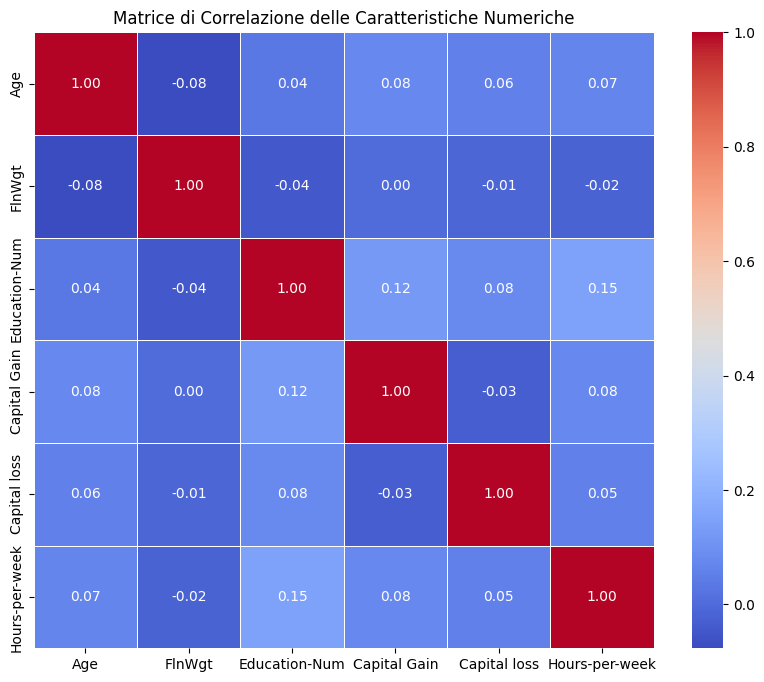

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona solo le colonne numeriche
numerical_features = dataframe.select_dtypes(include=['float64', 'int64'])

# Calcola la matrice di correlazione
correlation_matrix = numerical_features.corr()

# Visualizza la matrice di correlazione con una heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice di Correlazione delle Caratteristiche Numeriche")
plt.show()
